# Part II C3 Petrology - Practical 23: Estimating Mantle Temperatures - ANSWERS

*Simon Matthews (sm905@cam.ac.uk), Lent 2023*

In earlier lectures and practicals you have examined some of the methods that have been used to estimate mantle potential temperatures, $T_p$, from observations at mid-ocean ridges. In particular we have investigated how correlated variations in oceanic crustal thickness, ridge axial depth and MORB chemistry can be understood within the framework of a simple model of adiabatic decompression melting. The correlated variations are thought to reflect variations in $T_p$ of about 200$^{\circ}$C around the global MOR system.

It is useful to find independent observations that can be used to constrain $T_p$ that rely on different sets of assumptions to those involved in the modelling described above. A very popular technique is to use petrological observations to estimate the temperatures of primary mantle melts, and then correcting for heat conversion during melting to arrive at $T_p$. The first step generally involves using the temperature dependence of mineral-mineral or mineral-melt equilibria combined with measured mineral and rock compositions. One such petrological thermometer is based on the temperature-dependence of aluminium partitioning in olivine (the olivine-spinel Al-exchange thermometer).

In this practical you will use this thermometer to estimate the temperature at which primitive olivine crystals form in Iceland and MORB. You will then set up a simple model to relate crystallisation temperatures to mantle $T_p$.

## 1. How does Al-in-olivine thermometry work?

As you might expect from thermodynamic arguments, the ability of olivine to tolerate Al within its structure increases with increasing temperature. In effect, the partition coefficient of Al between olivine and melt rises at higher temperatures. It is also well known that the partitioning of Fe and Mg between olivine and melt is strongly temperature dependent. So, if we can find pairs of olivine and liquid that we know were in chemical equilibrium at igneous conditions, we might be able to use them as thermometers - much like the approach that you may familiar with from metamorphic petrology.

### 1.1 Petrography, chemical mapping and equilibrium

Take a look at the image below, which shows a map of the Fe content of part of the glassy rim of an olivine-porphyritic pillow lava. The basaltic glass is blue and olivines are mostly green.

![](femap.jpg)

The zonation patterns observed in the olivines are almost ubiquitous in macrocrysts from MORB.

#### Q1.1: What challenges do such zoning patterns present for thermometry in basaltic systems?

🟢 *The melt is not in equilibrium with the olivine cores. This means that it will be difficult to precisely estimate the composition of the liquid that was in equilibrium with the cores, meaning that the high temperature part of the crystallisation path is inaccessible to such thermometry.*

#### Q1.2: How might you estimate the composition of the magma that the cores of olivine crystals are in equilibrium with? Is this likely to be the melt the olivine crystallised from?

🟢 *One approach people have taken is to add back in olivine to the melt composition. But this only works if olivine was the only phase crystallising AND you need to know when to stop adding back olivine! It is also unlikely that the magma was descended from any one individual primary melt- instead it is likely to be a homogenised mixture of melts.*

### 1.2 Thermometry equations

In order to circumvent these problems, scientists such as [Coogan et al.](http://www.sciencedirect.com/science/article/pii/S0009254114000278) have investigated the partitioning of Al between olivine and spinel. The hope here is that spinel inclusions trapped inside olivine crystallisting from primitive melts can retain their high temperature equilibrium compositions because Al diffusion is very slow in olivine. Chromian spinel is a common liquidus phase in primitive basaltic melts, so is often found in association with highly forsteritic olivines that grow at high temperatures in basaltic systems.

Coogan et al. suggested that the dominiant mode of Al exchange between olivine and spinel involved the following reaction:
$$\require{mhchem}$$
$$\ce{MgAl2O4 (spinel) -> (MgAl) AlO4 (olivine)}$$

with the charge balance being maintained as $\ce{Al^{3}+}$ replaces one $\ce{Mg^{2}+}$ on an M site and one $\ce{Si^{4}+}$ on a T site when compared with forsterite $\ce{Mg2SiO4}$. Their experimental data was used to provide the following empirical thermometer for Al-in-ol:

$$T = \frac{10000}{(A +B \times Cr{\#} + C \times \ln{k_d})}$$

where $T$ is the equilibrium temperature in Kelvin, the 'chrome-number' of the spinel is given by:

$$ Cr{\#} = \frac{X_{Cr}}{X_{Cr}+X_{Al}}$$

with $X_{Cr}$ and $X_{Al}$ being the mole fractions of Cr and Al in the spinel. The partition coefficient of Al between the olivine and spinel is given by

$$ k_d = \frac{\ce{Al2O3^{ol}}}{\ce{Al2O3^{sp}}}$$

with $\ce{Al2O3^{ol}}$ and $\ce{Al2O3^{sp}}$ being wt% oxide contents of Al in the olivine and spinel respectively. The constants in the thermometer are determined by multiple linear regression and are given as $A= 0.575 \pm 0.162$, $B= 0.884 \pm 0.043$ and $C = -0.897 \pm 0.25$ by Coogan et al.

#### Q1.3: Check by inspection of the equations that you can see that higher Al contents in olivines correspond to higher temperatures of equilibration.

## 2. Application of the thermometer to data from spreading ridges

### 2.1. Data Processing

A table is provided in the file *olsp.csv* that contains olivine and spinel compositions from various spreading ridge settings.

#### Q2.1: Using what you learnt in the last practical, read in this file. Read the [manual](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) and add this line of code to a cell below.

In [2]:
# Your code here...

import pandas as pd
olsp = pd.read_csv('olsp.csv')
olsp.head()

,Ridge,Locality,Sample,SiO2_ol,MgO_ol,FeO_ol,NiO_ol,CaO_ol,Al2O3_ol,MgO_sp,Cr2O3_sp,Al2O3_sp,FeO_sp
0,Iceland,Borgahraun,BH22,40.86,47.05,10.19,0.28,0.37,0.072,15.48,43.68,24.95,14.76
1,Iceland,Borgahraun,BH22,40.69,46.41,11.21,0.30,0.37,0.064,15.25,40.94,26.74,16.02
2,Iceland,Borgahraun,BH22,40.07,44.50,14.02,0.23,0.38,0.052,12.81,40.63,22.79,21.67
3,Iceland,Borgahraun,BH22,40.20,46.80,11.36,0.28,0.33,0.076,18.42,20.75,44.33,14.21
4,Iceland,Borgahraun,BH38,40.33,47.74,9.71,0.29,0.38,0.072,17.98,27.88,37.94,13.14


The compositions are provided as wt% oxides and the olivine compositions are in columns with the "_ol" in the header and the spinel compositions have "_sp". Next, we should calculate the forsterite content of the olivines and store it in the same data file.

#### Q2.2: Use the same approach as in the previous practicals to add a new column to your dataframe that contains your estimate of forsterite content.

*Here is a [useful Pandas data wrangling cheatsheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) - look for "Make New Columns".*

*Remember, to calculate the molar proportion of forsterite in the olivine compositions we need to use the molecular weights of FeO and MgO.*

In [4]:
m_Mg = 24.305+15.999
m_Fe = 55.845+15.999

olsp['Fo'] = (olsp.MgO_ol / m_Mg) / (olsp.MgO_ol / m_Mg + olsp.FeO_ol / m_Fe)
olsp['Fo']

0     0.891664
1     0.880666
2     0.849802
3     0.880148
4     0.897584
        ...   
77    0.871627
78    0.876261
79    0.886522
80    0.884154
81    0.882032
Name: Fo, Length: 82, dtype: float64

#### Q2.3: Now, make a plot to see if we can see any obvious differences in the Al content of olivines from different portions of the mid-ocean ridge system.

*Here's some code to get you started, but you will need to edit it for the variable names you used in the previous steps:*

In [5]:
# Import packages we will want to use:
import matplotlib.pyplot as plt
import numpy as np

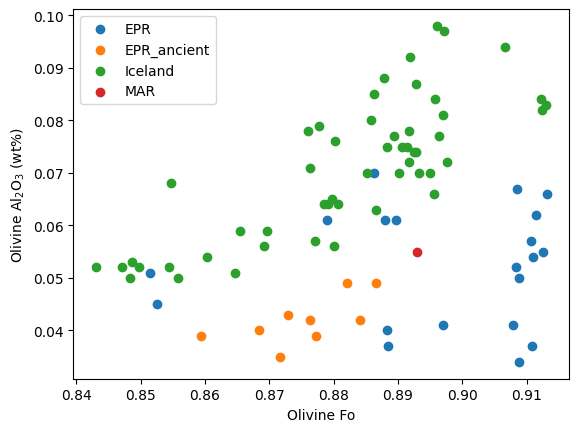

In [6]:
# Split the data in groups according to which ridge it is listed as in the table:
groups = olsp.groupby('Ridge')

# Start making a matplotlib plot
fig, ax = plt.subplots()

# Run a block of code for each of the groups:
for name, group in groups:
    ax.scatter(group.Fo, group.Al2O3_ol, label=name)

# Create a legend using the labels given in the scatter command above:
ax.legend()

# Set the axis labels:
ax.set_xlabel('Olivine Fo')
ax.set_ylabel('Olivine Al$_2$O$_3$ (wt%)')

# Display the plot
plt.show()

#### Q2.4: Based on observations from this plot, what would your initial estimate be of the relative difference in $T_p$ between Iceland and the other stretches of spreading ridges? Why?

🟢 *The higher Al<sub>2</sub>O<sub>3</sub> of the Icelandic olivines, across a wide range of forsterite contents, indicates that the Icelandic crystallisation temperatures are higher. This may correspond to a higher mantle $T_p$*

## 3. Quantifying Crystallisation Temperatures

Comparing only the Al<sub>2</sub>O<sub>3</sub> contents of olivine between locations doesn't account for any differences in melt composition.

#### Q3.1: Why might melt composition (in particular Al<sub>2</sub>O<sub>3</sub>) vary systematically with $T_p$?

🟢 *The composition of magma is a function of the pressure and temperature at which it is produced. Higher $T_p$ melting will start at greater pressures and occur at higher temperatures. Al<sub>2</sub>O<sub>3</sub> generally increases with decreasing pressure, and increases with increasing temperature.*

#### Q3.2: Using the equations for the olivine-spinel aluminium-exchange thermometer given above, calculate the crystallisation temperatures of the olivine spinel pairs

*You might want to calculate each parameter needed for equation individually before calculating the crystallisation temperature.*

*Numpy (imported already) has a function for calculating the natural logarithm. You might be able to guess what it is called, or you can find it in the Numpy documentation (via google).*

In [ ]:
# Your code here...

A = 0.575
B = 0.884
C = -0.897

kd = olsp.Al2O3_ol / olsp.Al2O3_sp

m_Cr = 51.9961
m_Al = 26.982

Crn = (olsp.Cr2O3_sp / m_Cr) / (olsp.Cr2O3_sp / m_Cr + olsp.Al2O3_sp / m_Al)

Tcrys = 10000 / (A + B * Crn + C * np.log(kd)) - 273.15

olsp['Tcrys'] = Tcrys

Tcrys

0     1329.047705
1     1294.295780
2     1275.769517
3     1274.725449
4     1279.495429
         ...     
77    1140.481676
78    1171.665619
79    1198.075942
80    1168.582642
81    1199.076254
Length: 82, dtype: float64

#### Q3.3: Make a plot of crystallisation temperature vs forsterite content.

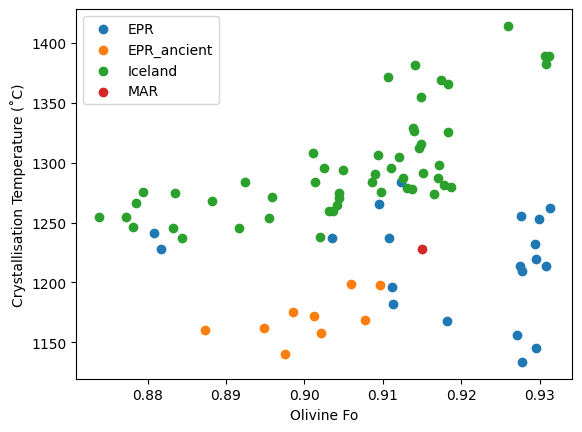

In [ ]:
# Your code here...

groups = olsp.groupby('Ridge')

fig, ax = plt.subplots()

for name, group in groups:
    ax.scatter(group.Fo, group.Tcrys, label=name)

ax.set_xlabel('Olivine Fo')
ax.set_ylabel('Crystallisation Temperature (˚C)')

ax.legend()

plt.show()

#### Q3.4: Comment on the observed relationship between olivine-spinel equilibration temperature and host olivine forsterite content within the Icelandic sample set. Which of these olivine-spinel pairs is most suitable for estimating mantle temperatures?

🟢 *The positive correlation between crystallisation temperature and olivine forsterite content is expected from the olivine binary phase loop. The olivine-spinel pairs that crystallised from the hottest melts (i.e. the melts crystallising the most forsteritic olivines) should provide the most reliable estimates of the temperatures of mantle melts supplied from the melting region in each case. These estimates of melt temperature may then be used to estimate mantle $T_p$*

#### Q3.5 What is the apparent temperature difference between the crystallisation of the most primitive melts from Iceland and the East Pacific rise? How does this difference compare with the global temperature variations inferred from the correlations between observed Na<sub>8</sub> and oceanic crustal thickness?

🟢 *The difference looks like about 150$^{\circ}$C, a little bit less than the global range inferred by Langmuir and co-workers. However, it is worth noting that we have only examined crystallisation temperatures in two locations - while the Gale et al dataset has an good global coverage.*

## 4. Estimating Mantle Potential Temperature

Now we will use these crystallisation temperatures to estimate the variation in $T_p$ between the rift segments.

#### Q4.1 Why are the maximum crystallisation temperatures not identical to mantle $T_p$?

🟢 *They are related temperatures, but clearly different. $T_p$ is the extension of the mantle adiabat to 1 bar pressure. The temperature of the mantle within the melting region is influenced by the latent heat of melting, so will sit at a lower temperature than the adiabat. The crystallisation of primitive melts may also occur at significant depths, corresponding to pressures of several kbar. The most forsteritic olivines that are sampled may not correspond to the most forsteritic olivines present in the population. Supra-liquidus cooling of primary melts may also take place prior to arrival of both olivine and spinel on the liquidus.*

In your lecture notes, find the expressions you would need to use to calculate the temperature change during mantle melting and decompression.

#### Q4.1: Outline broadly how these expressions would be used in practice to calculate the temperature changes (i.e., what would the algorithm look like)?

*Please ask a demonstrator if this isn't clear*

🟢 *The calculation has to be performed in pressure decrements, solving at each step for the change in melt fraction due to decompression, and then the change in temperature due to decompression + melting. However, the expressions are inter-dependent, so they must be solved (or integrated) simultaneously.*

#### Q4.2: Why does the temperature of the mantle decrease during melting? What is happening to the heat energy?

🟢 *The melting reaction consumes heat energy by the latent heat of melting.*

These expressions turn out to be straightforward to calculate, but doing so is extremely tedious and time consuming. Fortunately this is what the python module `pyMelt` is designed to do!

Here's some code that loads pyMelt, creates a mantle lithology, melts it at a given $T_p$, and then calculates the primary crystallisation temperature:

In [ ]:
import pyMelt as m # Only need to run once

In [ ]:
# Create a KLB1 lherzolite:
lz = m.lithologies.matthews.klb1()

# Make a mantle out of this lherzolite:
mantle = m.mantle([lz], [1.0], ['lz'])

# Melt it at a Tp of 1400 degC to generate a melting column:
column = mantle.adiabaticMelt(1400.0)

# Create a Spreading ridge from this melting column:
ridge = m.geosettings.spreadingCentre(column)

# Calculate the crystallisation temperature and print it:
Tcrys_model = ridge.meltCrystallisationT()[0]
print('Tcrys is {:.0f}˚C'.format(Tcrys_model))

Tcrys is 1272˚C


But what happens in this final step of the calculation? Well we can visualise it here:

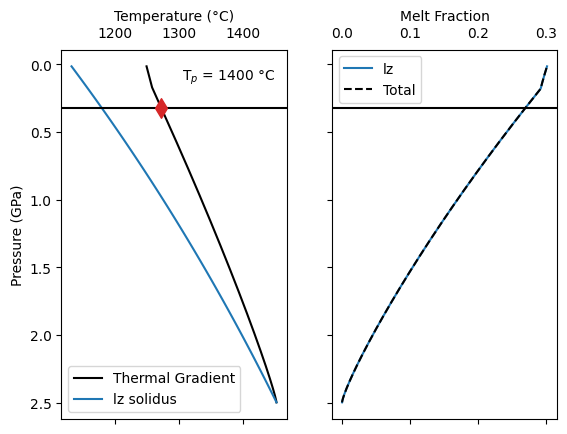

In [ ]:
# Get the default plot from pyMelt:
fig, ax = column.plot()

ax[0].axhline(ridge.P_base_of_crust, c='k')
ax[1].axhline(ridge.P_base_of_crust, c='k')

ax[0].scatter([Tcrys_model], [ridge.P_base_of_crust],
              marker='d', c='C3', s=100, zorder=10)

plt.show()

In this plot I have drawn the crustal thickness on using a horizontal black line, and added the calculated crystallisation temperature as the red diamond. Note that the diamond is at the base of the crust. This is because, unless you tell it otherwise, pyMelt will assume magmas crystallise at the base of the crust (and are then entrained prior to eruption).

#### Q4.2: How do expect the crystallisation temperature would be different were the melts to ascend to a shallower magma chamber before crystallising?

🟢 *The melt would follow the liquid adiabat. However, the liquid adiabat is quite steep so this introduces relatively little change in temperature. To add a further complexity, the position of the olivine liquidus may also change with pressure, but it turns out this change is very close to that of the liquid adiabat.*

#### Q4.3: Use the code above to estimate the $T_p$ for Iceland and MORB

*You might want to copy and paste it for each place*

In [ ]:
# Your code here...

#### ICELAND #### TP = 1535 degC ##########

# Create a KLB1 lherzolite:
lz = m.lithologies.matthews.klb1()

# Make a mantle out of this lherzolite:
mantle = m.mantle([lz], [1.0], ['lz'])

# Melt it at a Tp of 1400 degC to generate a melting column:
column = mantle.adiabaticMelt(1535.0)

# Create a Spreading ridge from this melting column:
ridge = m.geosettings.spreadingCentre(column)

# Calculate the crystallisation temperature and print it:
Tcrys_model = ridge.meltCrystallisationT()[0]
print('Tcrys is {:.0f}˚C'.format(Tcrys_model))

Tcrys is 1400˚C


In [ ]:
# Your code here...

#### MORB #### TP = 1360 degC ##########

# Create a KLB1 lherzolite:
lz = m.lithologies.matthews.klb1()

# Make a mantle out of this lherzolite:
mantle = m.mantle([lz], [1.0], ['lz'])

# Melt it at a Tp of 1400 degC to generate a melting column:
column = mantle.adiabaticMelt(1360.0)

# Create a Spreading ridge from this melting column:
ridge = m.geosettings.spreadingCentre(column)

# Calculate the crystallisation temperature and print it:
Tcrys_model = ridge.meltCrystallisationT()[0]
print('Tcrys is {:.0f}˚C'.format(Tcrys_model))

Tcrys is 1251˚C


#### Q4.4: How big (approximately) do you think the uncertainty will be on the $T_p$ estimates? Will the uncertainty from the geothermometer calibration be the largest source of error? How many other sources of error can you think of?

🟢 *Probably many 10s of degrees, but it is tricky to quantify. The error on the crystallisation temperature from the geothermometer calibration is likely to be $\sim$30˚C, but there is also uncertainty in picking equilibrium pairs. The uncertainties in the mantle melting model are also large, i.e., the thermodynamic properties of the mantle and lithological heterogeneity (see below).*

#### Q4.5: How does the difference in calculated $T_p$ compare to the difference in crystallisation temperatures?

🟢 *The difference in $T_p$ is a little larger ($\sim$20˚C).*

An additional complexity when estimating mantle $T_p$ is mantle heterogeneity. For the approach we have taken lithological heterogeneity can affect the results significantly. We can get a feeling for this using pyMelt by introducing a pyroxenite component:

In [ ]:
# Create a pyroxenite (this is a hybrid pyroxenite composition):
px = m.lithologies.matthews.kg1()

# Create a heterogeneous mantle:
mantle = m.mantle([lz, px],
                  [0.9,  # The fraction of lherzolite
                   0.1], # The fraction of pyroxenite
                  ['lz', 'px'])

column = mantle.adiabaticMelt(1400)
ridge = m.geosettings.spreadingCentre(column)
Tcrys_model = ridge.meltCrystallisationT()[0]
print('Tcrys is {:.0f}˚C'.format(Tcrys_model))

Tcrys is 1248˚C


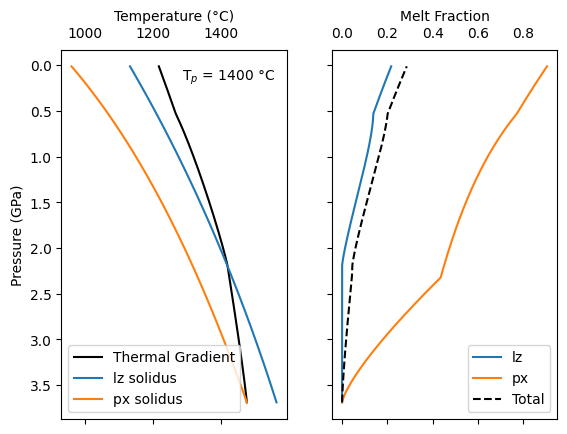

In [ ]:
f, a = column.plot()

#### Q4.6: How does introducing pyroxenite affect the estimated crystallisation temperature? Why?

🟢 *It decreases the crystallisation temperature because pyroxenite is more fusible, i.e., it melts more, and therefore extracts more heat energy and cools the mantle more.*

#### Q4.7: How might the presence of lithological heterogeneity introduce systematic errors into $T_p$ estimates derived using a lherzolitic mantle? In what sense will the estimates by biased?

🟢 *Mantle plume locations (where $T_p$ is likely to be high) are also likely to carry pyroxenitic material from the lower mantle, potentially leading to overestimates of $T_p$ at plume locations.*

## 5. Summary

This exercise is a based on work that came out of my Part III project several years ago... To read a full description of the method, the uncertainties, and the effect of lithological heterogeneity you can read [Matthews et al., 2016](http://onlinelibrary.wiley.com/wol1/doi/10.1002/2016GC006497/full). To see how we applied the same methods to OIB (and some of the additional uncertainties that introduces) you can read [Matthews et al., 2021](https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1029/2020GC009157). Also, take a look at the papers from, for example, [Dalton et al., 2014](http://science.sciencemag.org/content/344/6179/80.full) for an understanding of how such petrological constraints on mantle $T_p$ might be related to geophysical observables.